<a href="https://colab.research.google.com/github/Nkeh/ml-tasks/blob/main/CNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nkehbonya","key":"61457180dfdb997ecec8a546fd15e80d"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

Dataset URL: https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.24G/3.24G [00:35<00:00, 37.3MB/s]
100% 3.24G/3.24G [00:35<00:00, 97.1MB/s]


In [8]:
!ls

a-large-scale-fish-dataset.zip	kaggle.json  otje.jpg  sample_data


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('a-large-scale-fish-dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [10]:
import pandas as pd
import numpy as np
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

Reading path of images

In [11]:
img_path = []
for name in glob('/content/files/Fish_Dataset/Fish_Dataset/*/*', recursive=True):
  if name.endswith('.txt') or name.endswith('.m'):
    pass
  else:
    img_path.append(name)

In [12]:
img_path

['/content/files/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel',
 '/content/files/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream',
 '/content/files/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream',
 '/content/files/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass',
 '/content/files/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet',
 '/content/files/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet GT',
 '/content/files/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp GT',
 '/content/files/Fish_Dataset/Fish_Datas

Removing GT images

In [13]:
patches = []
for i in img_path:
  if i.endswith('GT'):
    pass
  else:
    patches += glob(i+'/*.png')

In [14]:
img_path = patches
img_path = pd.Series(img_path).astype(str)
img_path.head()

,0
0,/content/files/Fish_Dataset/Fish_Dataset/Hours...
1,/content/files/Fish_Dataset/Fish_Dataset/Hours...
2,/content/files/Fish_Dataset/Fish_Dataset/Hours...
3,/content/files/Fish_Dataset/Fish_Dataset/Hours...
4,/content/files/Fish_Dataset/Fish_Dataset/Hours...


In [15]:
labels = []
for i in img_path:
  labels.append(i.split('/')[5])

set(labels)

{'Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout'}

In [16]:
print(len(img_path), len(labels))

9000 9000


In [17]:
labels = pd.Series(labels)

In [18]:
df = pd.concat([img_path, labels], axis=1)

In [19]:
df.head()

,0,1
0,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
1,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
2,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
3,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
4,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: '0'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('0')):
  _plot_series(series, series_name, i)
  fig.legend(title='0', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

KeyError: '0'

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['0'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='0', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
df = df.rename(columns={0:'path', 1:'label'})

In [21]:
df.head()

,path,label
0,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
1,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
2,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
3,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
4,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel


Check if the classes are balanced

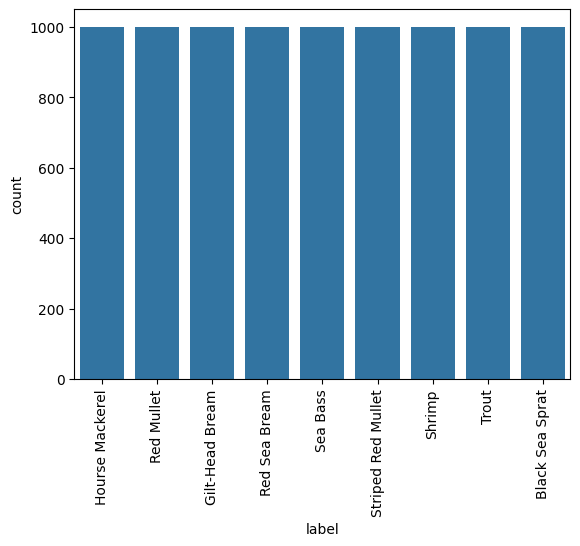

In [22]:
x = sn.countplot(data=df, x='label')
plt.xticks(rotation=90);

Shuffle the DataFrame before splitting

In [23]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,path,label
8632,/content/files/Fish_Dataset/Fish_Dataset/Black...,Black Sea Sprat
539,/content/files/Fish_Dataset/Fish_Dataset/Hours...,Hourse Mackerel
5195,/content/files/Fish_Dataset/Fish_Dataset/Strip...,Striped Red Mullet
8983,/content/files/Fish_Dataset/Fish_Dataset/Black...,Black Sea Sprat
1323,/content/files/Fish_Dataset/Fish_Dataset/Red M...,Red Mullet


In [24]:
df_train = df[:6000]
df_test = df[6000:7500]
df_valid = df[7500:9000]

In [25]:
print(len(df_train), len(df_test), len(df_valid))

6000 1500 1500


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [27]:
input_shape = (224, 224, 3)
batch_size = 32
epochs=100
training_size = 6000
valid_size = 1500

In [28]:
train_set = datagen.flow_from_dataframe(dataframe = df_train,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

test_set = datagen.flow_from_dataframe(dataframe = df_test,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

valid_set = datagen.flow_from_dataframe(dataframe = df_valid,
                                        x_col='path',
                                        y_col='label',
                                        target_size=(input_shape[0], input_shape[1]),
                                        class_mode='categorical',
                                        batch_size=batch_size,
                                        shuffle=False)

Found 6000 validated image filenames belonging to 9 classes.
Found 1500 validated image filenames belonging to 9 classes.
Found 1500 validated image filenames belonging to 9 classes.


In [29]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(filters=8, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))

# model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2))
# model.add(Dropout(0.5))

#model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 8)    │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 223, 223, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 16)   │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 110, 110, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 48400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    24,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,786,657 (94.55 MB)

 Trainable params: 24,786,609 (94.55 MB)

 Non-trainable params: 48 (192.00 B)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='fish.weights.best.keras', verbose=1, save_best_only=True)
early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      verbose=1)
learn = ReduceLROnPlateau(monitor='val_accuracy',
                          patience=2,
                          verbose=1,
                          factor=0.2,
                          min_lr=0.0001)

In [33]:
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(valid_size)

print(steps_per_epoch, val_steps)

188 47


In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_set,
                    validation_steps = val_steps,
                    epochs=epochs,
                    callbacks=[checkpointer, learn, early],
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5533 - loss: 10.1514

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 41.25859, saving model to fish.weights.best.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.5542 - loss: 10.1153 - val_accuracy: 0.1893 - val_loss: 41.2586 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9256 - loss: 0.2112
Epoch 2: val_loss improved from 41.25859 to 28.25709, saving model to fish.weights.best.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.9257 - loss: 0.2112 - val_accuracy: 0.2580 - val_loss: 28.2571 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9528 - loss: 0.1323
Epoch 3: val_loss improved from 28.25709 to 8.54272, saving model to fish.weights.best.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.9528 - loss: 0.1322 - val_accuracy: 0.4280 - val_loss: 8.5427 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9791 - loss: 0.0673
Epoch 4: val_loss improved from 8.54

As we can see the model is overfitting.
So we will use transfer learning instead

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16(include_top=False, input_shape=input_shape)
# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(512, activation='relu',)(flat1)
output = Dense(9, activation='softmax')(class1)
	# define new model
model = Model(inputs=model.inputs, outputs=output)
	# compile model

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
val_steps = compute_steps_per_epoch(valid_size)

print(steps_per_epoch, val_steps)

188 47


In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=valid_set,
                    validation_steps = val_steps,
                    epochs=epochs,
                    callbacks=[checkpointer, learn, early],
                    verbose=1)

Epoch 1/100
188/188 [==============================] - 78s 414ms/step - loss: 0.9637 - accuracy: 0.8240 - val_loss: 0.0968 - val_accuracy: 0.9813

Epoch 00001: val_loss improved from 2.13480 to 0.09683, saving model to fish.weights.best.hdf5
Epoch 2/100
188/188 [==============================] - 78s 413ms/step - loss: 0.0418 - accuracy: 0.9932 - val_loss: 0.0300 - val_accuracy: 0.9967

Epoch 00002: val_loss improved from 0.09683 to 0.03003, saving model to fish.weights.best.hdf5
Epoch 3/100
188/188 [==============================] - 77s 410ms/step - loss: 0.0096 - accuracy: 0.9997 - val_loss: 0.0288 - val_accuracy: 0.9927

Epoch 00003: val_loss improved from 0.03003 to 0.02877, saving model to fish.weights.best.hdf5
Epoch 4/100
188/188 [==============================] - 76s 404ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9980

Epoch 00004: val_loss improved from 0.02877 to 0.01648, saving model to fish.weights.best.hdf5
Epoch 5/100
188/188 [===========